# WeatherPy

---

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        #print(response)
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | aykhal
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | rantepao
Processing Record 9 of Set 1 | lavrentiya
Processing Record 10 of Set 1 | adre
Processing Record 11 of Set 1 | port hardy
Processing Record 12 of Set 1 | san andres
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | marcona
City not found. Skipping...
Processing Record 16 of Set 1 | yumen
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | mbala
Processing Record 22 of Set 1 | sinkat
City not found. Skipping...
P

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          527
Lat           527
Lng           527
Max Temp      527
Humidity      527
Cloudiness    527
Wind Speed    527
Country       527
Date          527
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,22.93,90,100,7.52,PF,1681435714
1,bluff,-46.6000,168.3333,15.44,70,0,5.48,NZ,1681435714
2,yellowknife,62.4560,-114.3525,-2.71,68,100,2.57,CA,1681435497
3,aykhal,66.0000,111.5000,-7.36,88,96,7.45,RU,1681435714
4,chuy,-33.6971,-53.4616,13.31,71,5,3.95,UY,1681435714


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,22.93,90,100,7.52,PF,1681435714
1,bluff,-46.6000,168.3333,15.44,70,0,5.48,NZ,1681435714
2,yellowknife,62.4560,-114.3525,-2.71,68,100,2.57,CA,1681435497
3,aykhal,66.0000,111.5000,-7.36,88,96,7.45,RU,1681435714
4,chuy,-33.6971,-53.4616,13.31,71,5,3.95,UY,1681435714


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

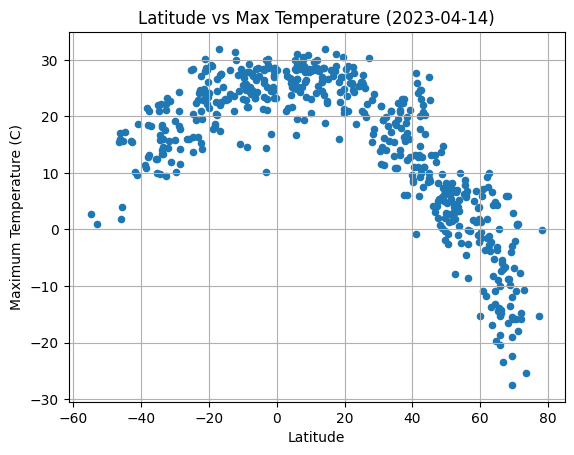

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp',kind='scatter')
# Incorporate the other graph properties
max_date = pd.to_datetime(city_data_df['Date'].max(), unit='s').date()
plt.title("Latitude vs Max Temperature ("+str(max_date)+")")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

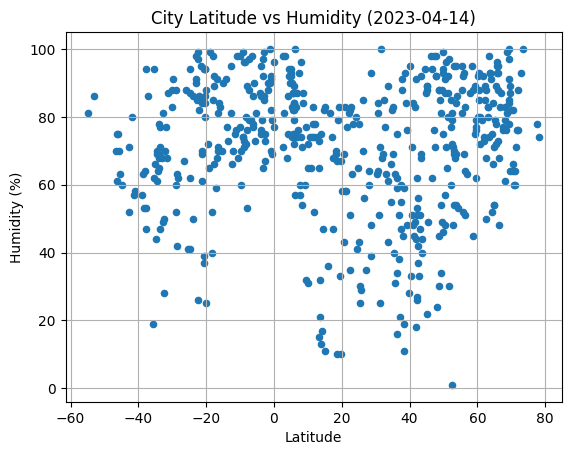

In [9]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
city_data_df.plot('Lat','Humidity',kind='scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity ("+str(max_date)+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

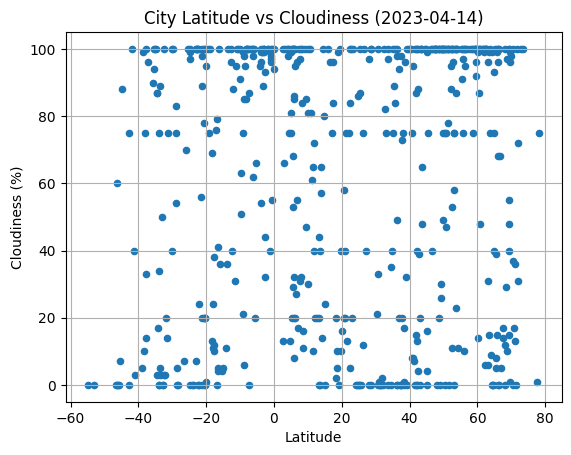

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat','Cloudiness',kind='scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness ("+str(max_date)+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

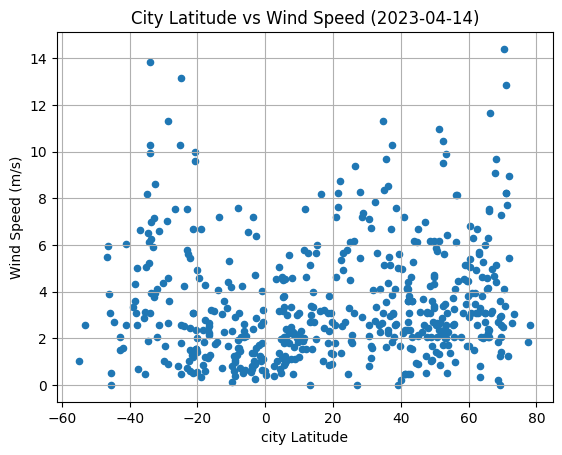

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat','Wind Speed',kind='scatter')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed ("+str(max_date)+")")
plt.xlabel("city Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def draw_regression_line(x_values,y_values,x,y):
    slope, intercept, rval, pval, std_err = linregress(x_values,y_values)
    print(f"The r-value is: {rval**2}")
    fit = slope * x_values  + intercept
    line_eq=f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.annotate(line_eq,(x,y),fontsize=15,color="red")
    plt.xlabel("Latitude")
    return plt.plot(x_values,fit,'-', color='r')

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yellowknife,62.4560,-114.3525,-2.71,68,100,2.57,CA,1681435497
3,aykhal,66.0000,111.5000,-7.36,88,96,7.45,RU,1681435714
8,lavrentiya,65.5833,-171.0000,-13.81,72,5,4.14,RU,1681435715
9,adre,13.4667,22.2000,24.49,21,0,3.40,TD,1681435716
10,port hardy,50.6996,-127.4199,8.10,71,75,2.06,CA,1681435716


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,22.93,90,100,7.52,PF,1681435714
1,bluff,-46.6000,168.3333,15.44,70,0,5.48,NZ,1681435714
4,chuy,-33.6971,-53.4616,13.31,71,5,3.95,UY,1681435714
5,punta arenas,-53.1500,-70.9167,1.06,86,0,2.57,CL,1681435265
6,busselton,-33.6500,115.3333,14.67,47,89,6.25,AU,1681435715


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7883377726950741


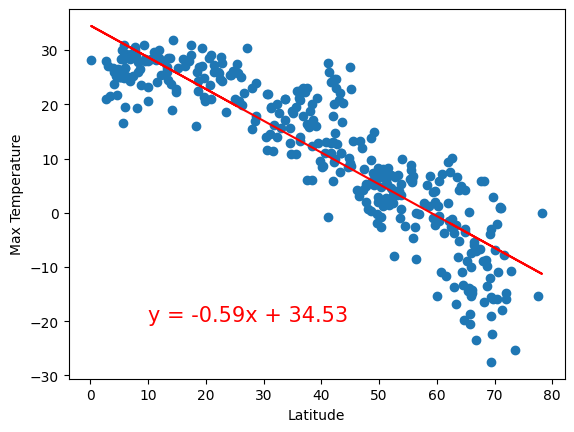

In [15]:
# Linear regression on Northern Hemisphere
draw_regression_line(northern_hemi_df['Lat'],northern_hemi_df["Max Temp"],10,-20)
plt.ylabel("Max Temperature")
plt.show()

The r-value is: 0.47651253644919617


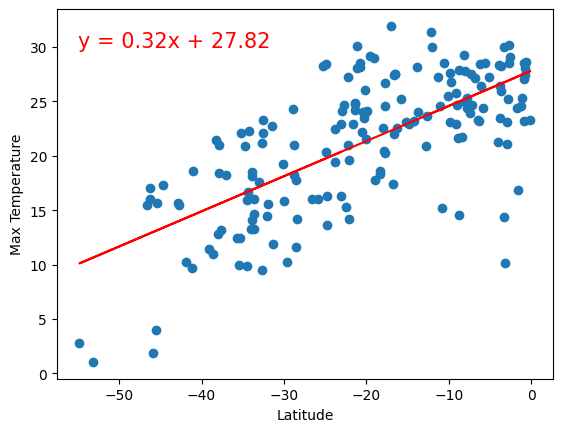

In [16]:
# Linear regression on Southern Hemisphere
draw_regression_line(southern_hemi_df['Lat'],southern_hemi_df["Max Temp"],-55,30)
plt.ylabel("Max Temperature")
plt.show()

**Discussion about the linear relationship:** Temperature variations in the northern hemishpere have a higher linear relationship with latititudes (74.62%) as compared to the relationship between temperatures and latitude in the southern hemisphere (42.42%).

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02403146041181447


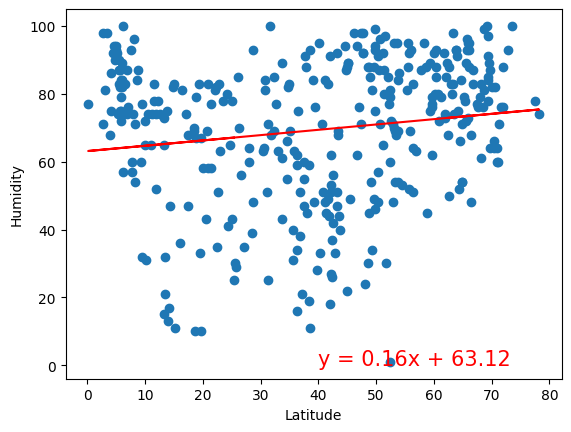

In [17]:
# Northern Hemisphere
draw_regression_line(northern_hemi_df['Lat'],northern_hemi_df["Humidity"],40,0)
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.13611357888026052


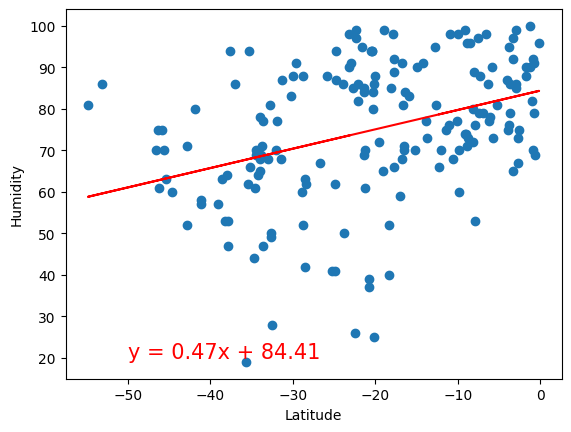

In [18]:
# Southern Hemisphere
draw_regression_line(southern_hemi_df['Lat'],southern_hemi_df["Humidity"],-50,20)
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** Only 12.21% of variations in humidity in the northern hemisphere are accounted for by the change in latitude while only 8.58% of hunidity variations in the southern hemisphere and be accounted for changes in latitude. Small linear relationship between humidity and latitude in both the hemispheres. 

### Cloudiness vs. Latitude Linear Regression Plot


The r-value is: 0.0036716844457742003


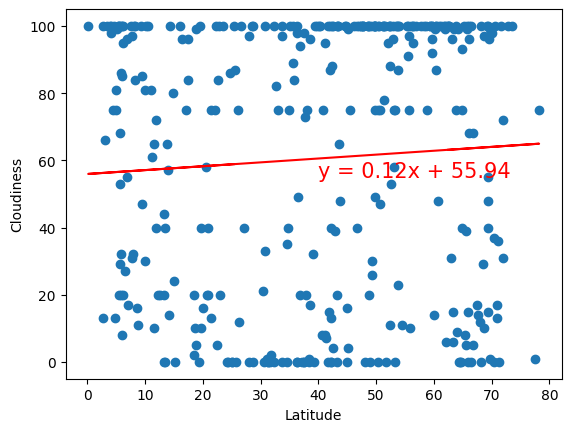

In [19]:
#Northern Hemisphere
draw_regression_line(northern_hemi_df['Lat'],northern_hemi_df["Cloudiness"],40,55)
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.1525575865511948


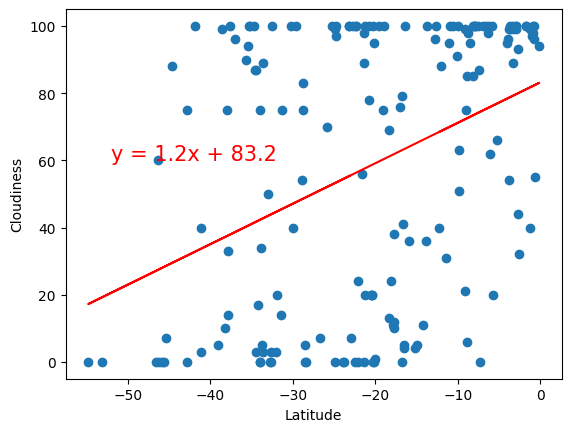

In [20]:
#Southern Hemisphere
draw_regression_line(southern_hemi_df['Lat'],southern_hemi_df["Cloudiness"],-52,60)
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:** Only 4.42% of cloudiness variations can be accounted for by changes in the northern hemishpere lattitudes, while onlt 13% of cloudiness variations can be accounted for by the changes in a Southern hemisphere latitude changes, very small linear relationship between cloudiness and latitude in both the hemishperes.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03977785052916939


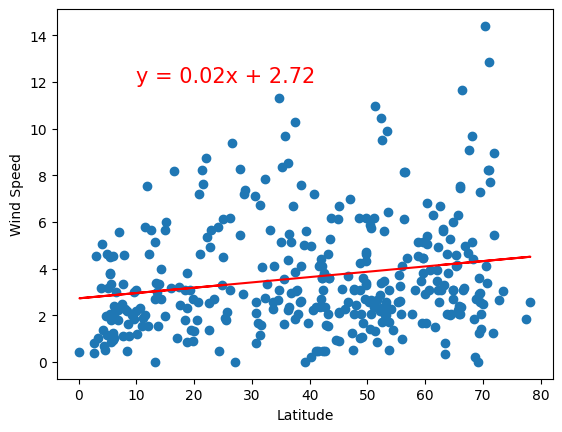

In [21]:
# Northern Hemisphere
draw_regression_line(northern_hemi_df['Lat'],northern_hemi_df["Wind Speed"],10,12)
plt.ylabel("Wind Speed")
plt.show()

The r-value is: 0.08079671808809896


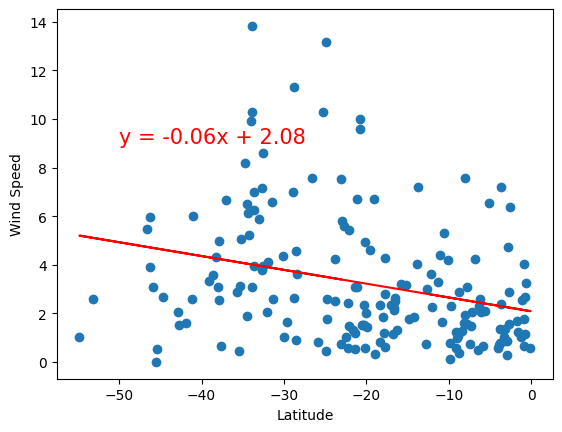

In [22]:
# Southern Hemisphere
draw_regression_line(southern_hemi_df['Lat'],southern_hemi_df["Wind Speed"],-50,9)
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** Only 0.96% of variations in wind speed is accounted for with change in the northern hemisphere latitdude and 7.73% of variations in wind speed is accounted for changes in the southern hemisphere latitude, very low linear relationship between wind speed and latitude in both the hemispheres.